# ---------------------------MOBILE PRICE RANGE PREDICTION :------------------------------


<img src="OIP.jpg" alt="Description de l'image">


# Introduction :

###### La régression linéaire multiple est une méthode statistique utilisée pour modéliser la relation entre une variable cible et plusieurs variables explicatives afin de prédire ou estimer cette variable cible en fonction des autres caractéristiques.


# Les variables :
#### battery_power : Énergie totale qu'une batterie peut stocker en une seule fois, mesurée en mAh
#### bleu : Avoir Bluetooth ou pas
#### clock_speed : vitesse à laquelle le microprocesseur exécute les instructions
#### dual_sim : Prend en charge ou non la double carte SIM
#### fc : Mégapixels de la caméra frontale
#### four_g : Avoir la 4G ou pas
#### int_memory : Mémoire interne en gigaoctets
#### m_dep : Profondeur mobile en cm
#### mobile_wt : Poids du téléphone mobile
#### n_cores : Nombre de cœurs du processeur
#### pc : Mégapixels de l'appareil photo principal
#### px_height : Hauteur de la résolution en pixels
#### px_width : Largeur de résolution en pixels
#### ram : Mémoire vive en mégaoctets
#### #### sc_h : Hauteur de l'écran du mobile en cm
#### sc_w : Largeur d'écran du mobile en cm
#### talk_time : durée la plus longue qu'une seule charge de batterie durera lorsque vous êtes
#### three_g : Avoir la 3G ou pas
#### touch_screen : Possède un écran tactile ou non
#### wifi : Avoir le wifi ou pas
#### price_range : Il s'agit de la variable cible avec une valeur de 0 (faible coût), 1 (coût moyen), 2 (coût élevé) et 3 (coût très élevé).

### Importation de bibliothèques :

In [105]:
# manipulation des tablaux et matrices
import numpy as np 

# pour importer les dataset
import pandas as pd  

# pour traçer des graphes
import matplotlib.pyplot as plt 

# pour la visialisation des données 
import seaborn as sns 

from pandas.plotting import scatter_matrix 
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler

#import warnings                 
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

### Importer le dataset :

In [106]:
 training_set= pd.read_csv("train.csv")

### Afficher les 5 premières lignes:

In [108]:
training_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### Afficher la dimension du dataset :

In [109]:
training_set.shape

(2000, 21)

##### ==> Ici, nous voyons que l'ensemble de données contient 2000 observations de 21 variables. La variable price_range est ceux que nous devons prévoir .

### Faire des statistique sur les données : 

In [110]:
training_set.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


##### Dans cette description, on a calculer le nombre de lignes , la moyenne, l'ecart type, la valeur minimale et d'autres quantitées pour l'ensemble des features.

### Afficher les noms des columns du datasets :

In [111]:
training_set.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Afficher le type des columns du datasets :

In [112]:
training_set.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### Vérification des valeurs nulles :

In [113]:
training_set.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

##### ==> Comme vous voiyez nous n'avons aucune donnée perdu .

### Informations sur data :

In [114]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# --------------Application de la regression sur price_range---------------

In [115]:
#spécifie le modèle, en utilisant la méthode des moindres carrés ordinaires (OLS) via smf.ols()
reg_multi = smf.ols(' price_range~ battery_power+ blue+clock_speed+dual_sim+fc+four_g+int_memory+m_dep+mobile_wt+n_cores+pc+px_height+px_width+ram+sc_h+sc_w+talk_time+three_g+touch_screen+wifi'
                    , data=training_set).fit() #la methode fit() pour entraîner le modèle en utilisant les données d'entraînement

In [116]:
#la méthode summary() est utilisée pour afficher un résumé détaillé des résultats de modèle.
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:14   Log-Likelihood:                -552.26
No. Observations:                2000   AIC:                             1147.
Df Residuals:                    1979   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5750      0.062    -25.553

#####                  -R²=0.919 ce qui signifie une correlation lenaire positif entre les variables.
#####                  -On observe les valeurs de P , on remarque qu'on a des valeurs superieur a 5% .

### Retirez les variables non significatives :

In [117]:
r_squared = round(reg_multi.rsquared, 5)
print(f"R-squared: {r_squared}")
adj_r_squared = round(reg_multi.rsquared_adj, 5)
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.91863
Adjusted R-squared: 0.91781


#### Retirer pc :

In [118]:
# reg_multi = smf.ols(' price_range~ talk_time+sc_w+sc_h+battery_power+int_memory+clock_speed+n_cores+ram+touch_screen+wifi+three_g+blue+dual_sim+fc+four_g+m_dep+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:15   Log-Likelihood:                -552.26
No. Observations:                2000   AIC:                             1147.
Df Residuals:                    1979   BIC:                             1264.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5750      0.062    -25.553

#### Retirer four_g :

In [119]:
reg_multi = smf.ols(' price_range~ talk_time+sc_w+sc_h+battery_power+int_memory+clock_speed+n_cores+ram+touch_screen+wifi+three_g+blue+dual_sim+fc+m_dep+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1242.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:16   Log-Likelihood:                -552.27
No. Observations:                2000   AIC:                             1143.
Df Residuals:                    1981   BIC:                             1249.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5744      0.061    -25.752

#### Retirer blue:

In [120]:
reg_multi = smf.ols(' price_range~ talk_time+sc_w+sc_h+battery_power+int_memory+clock_speed+n_cores+ram+touch_screen+wifi+three_g+dual_sim+fc+m_dep+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1316.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:16   Log-Likelihood:                -552.28
No. Observations:                2000   AIC:                             1141.
Df Residuals:                    1982   BIC:                             1241.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5753      0.061    -25.904

#### Retirer sc_w :

In [121]:
reg_multi = smf.ols(' price_range~ talk_time+sc_h+battery_power+int_memory+clock_speed+n_cores+ram+touch_screen+wifi+three_g+dual_sim+fc+m_dep+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1399.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:17   Log-Likelihood:                -552.29
No. Observations:                2000   AIC:                             1139.
Df Residuals:                    1983   BIC:                             1234.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5748      0.061    -25.929

#### Retirer talk_time :

In [122]:
reg_multi = smf.ols(' price_range~ sc_h+battery_power+int_memory+clock_speed+n_cores+ram+touch_screen+wifi+three_g+dual_sim+fc+m_dep+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1493.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:17   Log-Likelihood:                -552.33
No. Observations:                2000   AIC:                             1137.
Df Residuals:                    1984   BIC:                             1226.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5709      0.059    -26.597

#### Retirer m_dep :

In [123]:
reg_multi = smf.ols(' price_range~ sc_h+battery_power+int_memory+clock_speed+n_cores+ram+touch_screen+wifi+three_g+dual_sim+fc+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1600.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:17   Log-Likelihood:                -552.41
No. Observations:                2000   AIC:                             1135.
Df Residuals:                    1985   BIC:                             1219.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5756      0.058    -27.256

#### Retirer touch_screen :

In [124]:
reg_multi = smf.ols(' price_range~ sc_h+battery_power+int_memory+clock_speed+n_cores+ram+wifi+three_g+dual_sim+fc+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1724.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:18   Log-Likelihood:                -552.49
No. Observations:                2000   AIC:                             1133.
Df Residuals:                    1986   BIC:                             1211.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5790      0.057    -27.615

#### Retirer n_cores :

In [125]:
reg_multi = smf.ols(' price_range~ sc_h+battery_power+int_memory+clock_speed+ram+wifi+three_g+dual_sim+fc+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     1869.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:18   Log-Likelihood:                -552.65
No. Observations:                2000   AIC:                             1131.
Df Residuals:                    1987   BIC:                             1204.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5700      0.055    -28.571

#### Retirer sc_h :

In [126]:
reg_multi = smf.ols(' price_range~ battery_power+int_memory+clock_speed+ram+wifi+three_g+dual_sim+fc+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2039.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:18   Log-Likelihood:                -552.82
No. Observations:                2000   AIC:                             1130.
Df Residuals:                    1988   BIC:                             1197.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5574      0.051    -30.837

#### Retirer fc :

In [127]:
 reg_multi = smf.ols(' price_range~ battery_power+int_memory+clock_speed+ram+wifi+three_g+dual_sim+mobile_wt+px_height+px_width', data=training_set).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            price_range   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2244.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:23:19   Log-Likelihood:                -553.02
No. Observations:                2000   AIC:                             1128.
Df Residuals:                    1989   BIC:                             1190.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.5535      0.050    -30.996

In [128]:
r_squared = round(reg_multi.rsquared, 5)
print(f"R-squared: {r_squared}")
adj_r_squared = round(reg_multi.rsquared_adj, 5)
print(f"Adjusted R-squared: {adj_r_squared}")

R-squared: 0.91857
Adjusted R-squared: 0.91816


##### On remarque que:
#####    -tout les variables sont significatif 
   ###### -R²= 0.91857 et R² ajusté= 0.91816
 #### ==>donc on peut utiliser ce module à des fins de prévision

In [129]:
a_prev = pd.DataFrame({'battery_power':842,'int_memory':7,'clock_speed':2.2,'ram':2549,'wifi':1,'three_g':0,'dual_sim':0,'mobile_wt':188,'px_height':20,'px_width':756}, index=[0])
price_range = reg_multi.predict(a_prev)
print(round(price_range[0], 2))

1.3


#### --> Prédire une valeur de price_rang de 1.3

## Analyse des résultats:

#### Calculer les leviers :

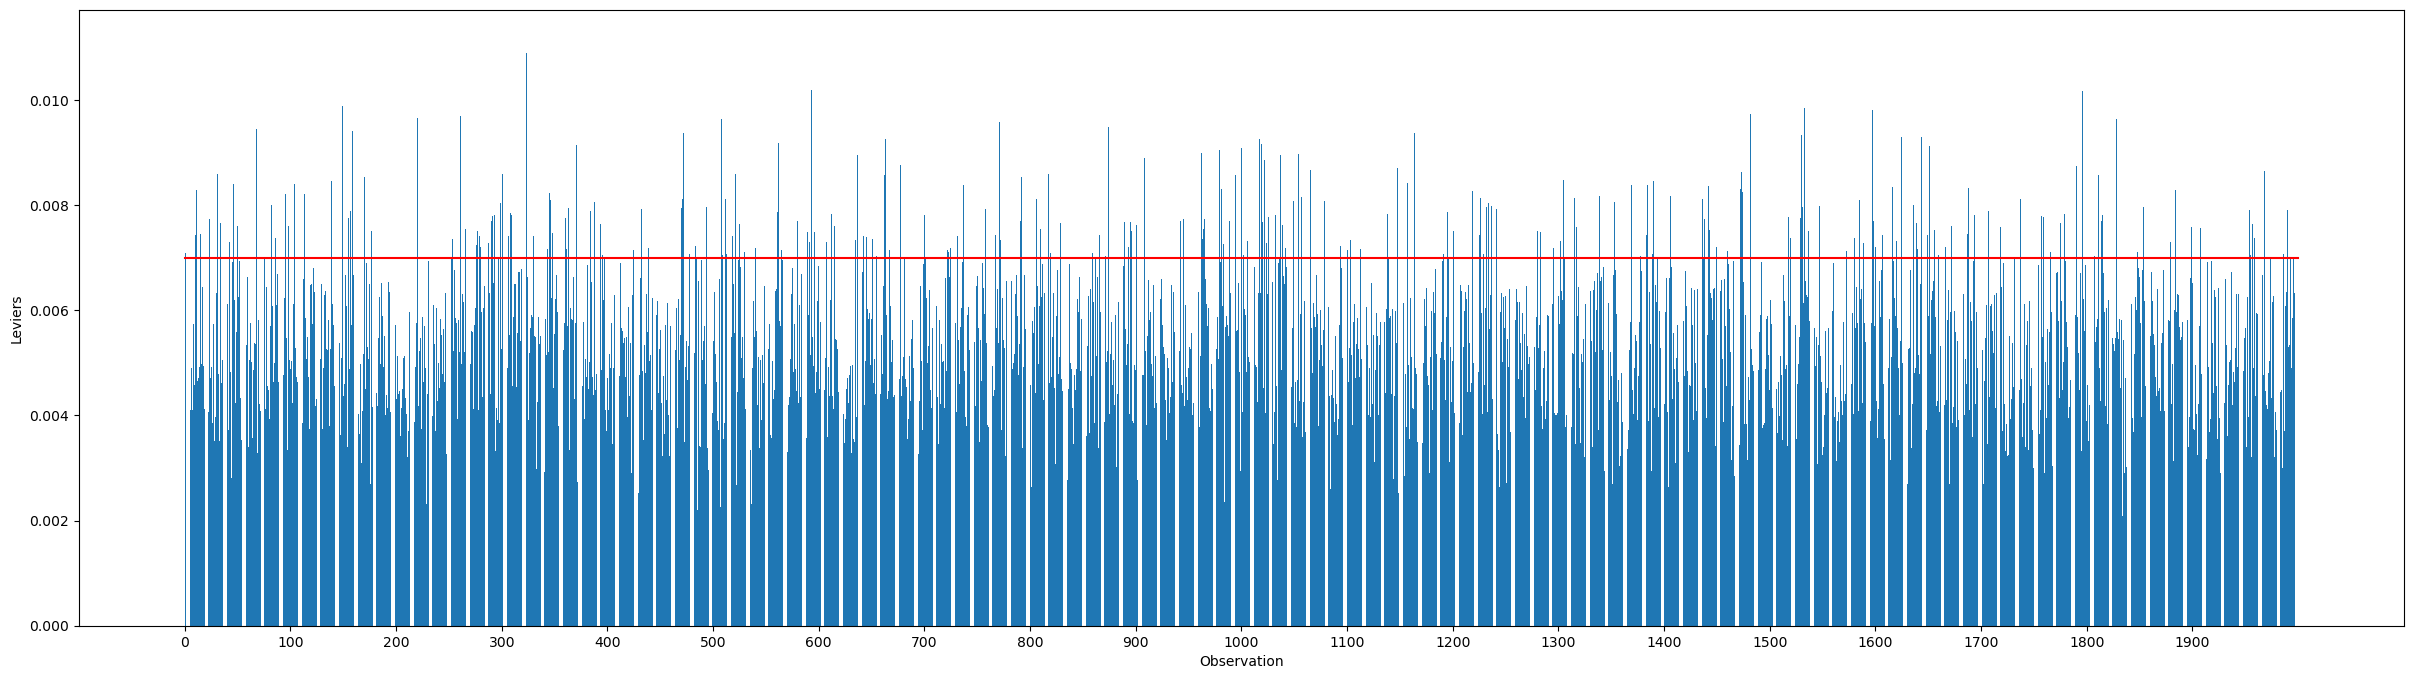

In [130]:
alpha = 0.05 #niveau de confiance

n = training_set.shape[0] # la taille de l'ensemble d'entraînement (training_set) 

p = 7 # nombre de prédicteurs ou variables indépendantes incluses dans le modèle de régression multiple

analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

#Calculer les leviers

analyses['levier'] = reg_multi.get_influence().hat_matrix_diag #Calcul des leviers : Les leviers sont des mesures qui évaluent l'influence de chaque observation sur la forme des estimations de régression. Ces leviers sont calculés à l'aide de la méthode reg_multi.get_influence().hat_matrix_diag.
seuil_levier = 2*p/n #seuil_levier = 2*p/n : C'est un seuil pour les leviers. En général, un levier est considéré comme élevé s'il dépasse ce seuil. Ce seuil est calculé comme étant égal à 2 fois le nombre de prédicteurs divisé par le nombre d'observations.
plt.figure(figsize=(30,8))
plt.bar(analyses['obs'], analyses['levier'])
plt.xticks(np.arange(0,2000, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0,2000], [seuil_levier, seuil_levier], color='r')
plt.show()

#### - ligne rouge représentant le seuil de levier. 

#### Retourne un DataFrame contenant uniquement les lignes où les valeurs dans la colonne 'levier' dépassent le seuil spécifié par seuil_levier :

In [131]:
analyses.loc[analyses['levier'] > seuil_levier, :] 

,obs,levier
0,1,0.007093
9,10,0.007441
10,11,0.008289
14,15,0.007456
22,23,0.007739
...,...,...
1958,1959,0.007367
1967,1968,0.008646
1985,1986,0.007070
1989,1990,0.007915


#### La comparaison des erreurs sur différentes observations peut aider à repérer les points de données qui pourraient avoir un effet disproportionné sur le modèle:


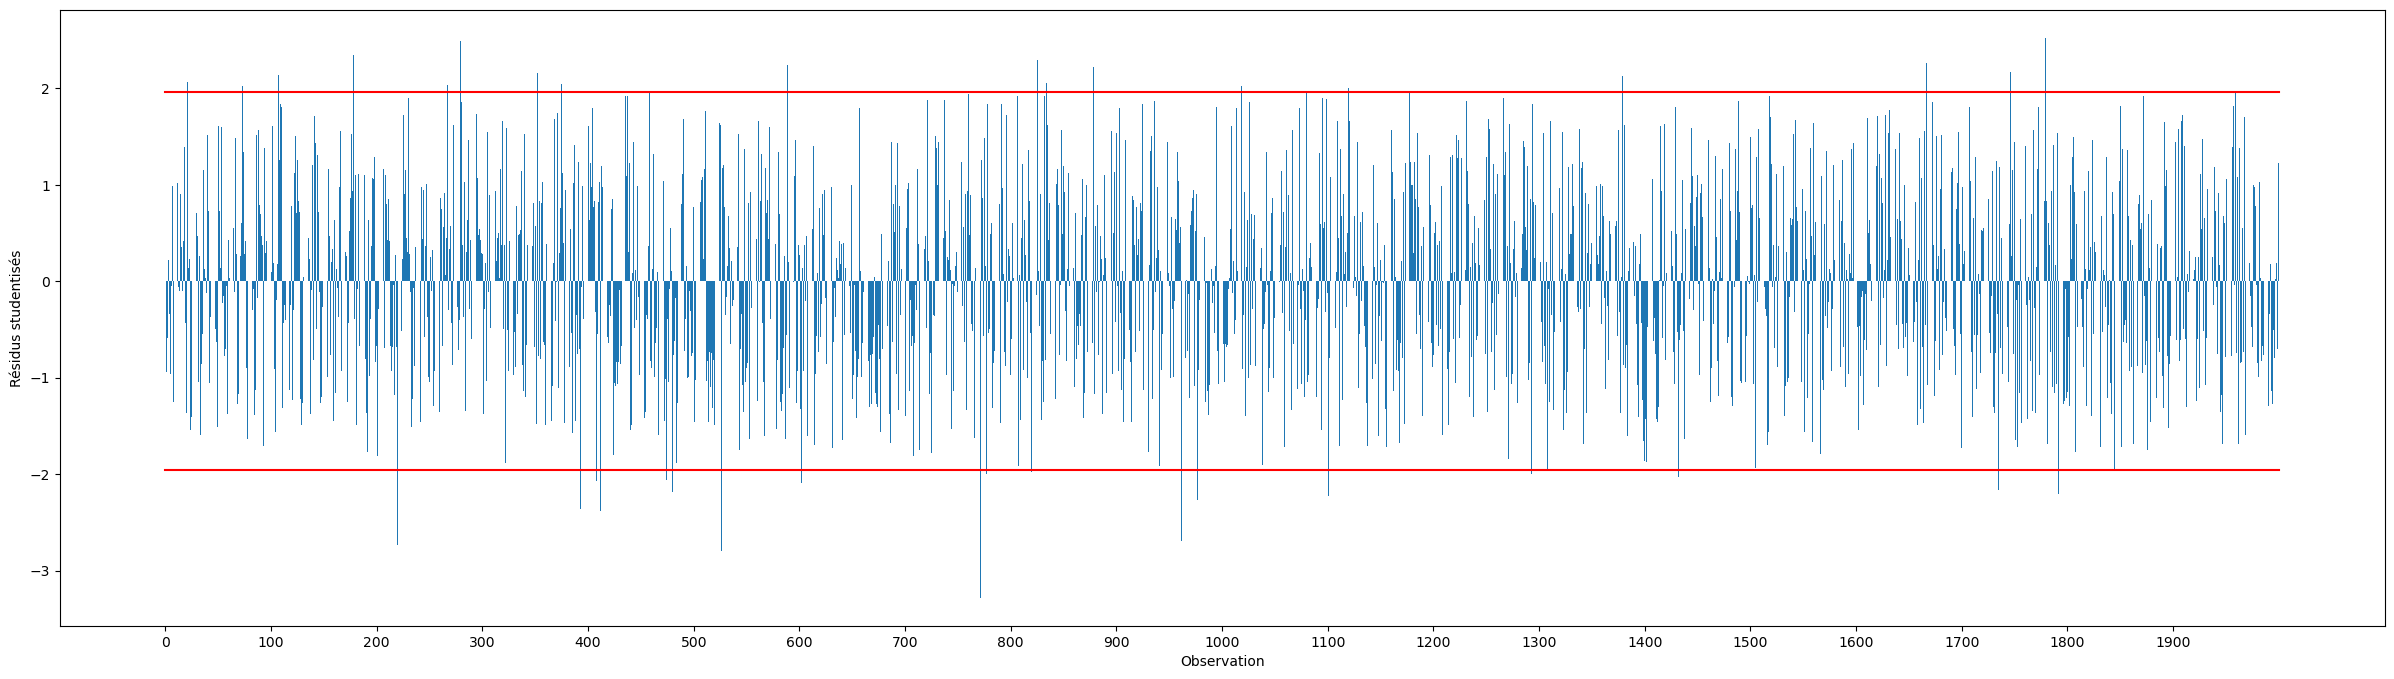

In [132]:
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
plt.figure(figsize=(30,8))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, 2000, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, 2000], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 2000], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

#### Retourne un DataFrame contenant les observations dont les résidus studentisés dépassent les seuils positif ou négatif :


In [133]:
analyses.loc[(analyses['rstudent'] > seuil_rstudent )| (analyses['rstudent'] < -seuil_rstudent) , :]

,obs,levier,rstudent
20,21,0.005508,2.060796
72,73,0.005474,2.026855
106,107,0.004639,2.136169
168,169,0.005160,2.011555
177,178,0.004169,2.340128
219,220,0.009664,-2.731895
266,267,0.005317,2.037902
278,279,0.007413,2.490802
351,352,0.006666,2.160999
362,363,0.007953,-2.126421


#### Utilise le critère de Cook pour detecter les points influent :

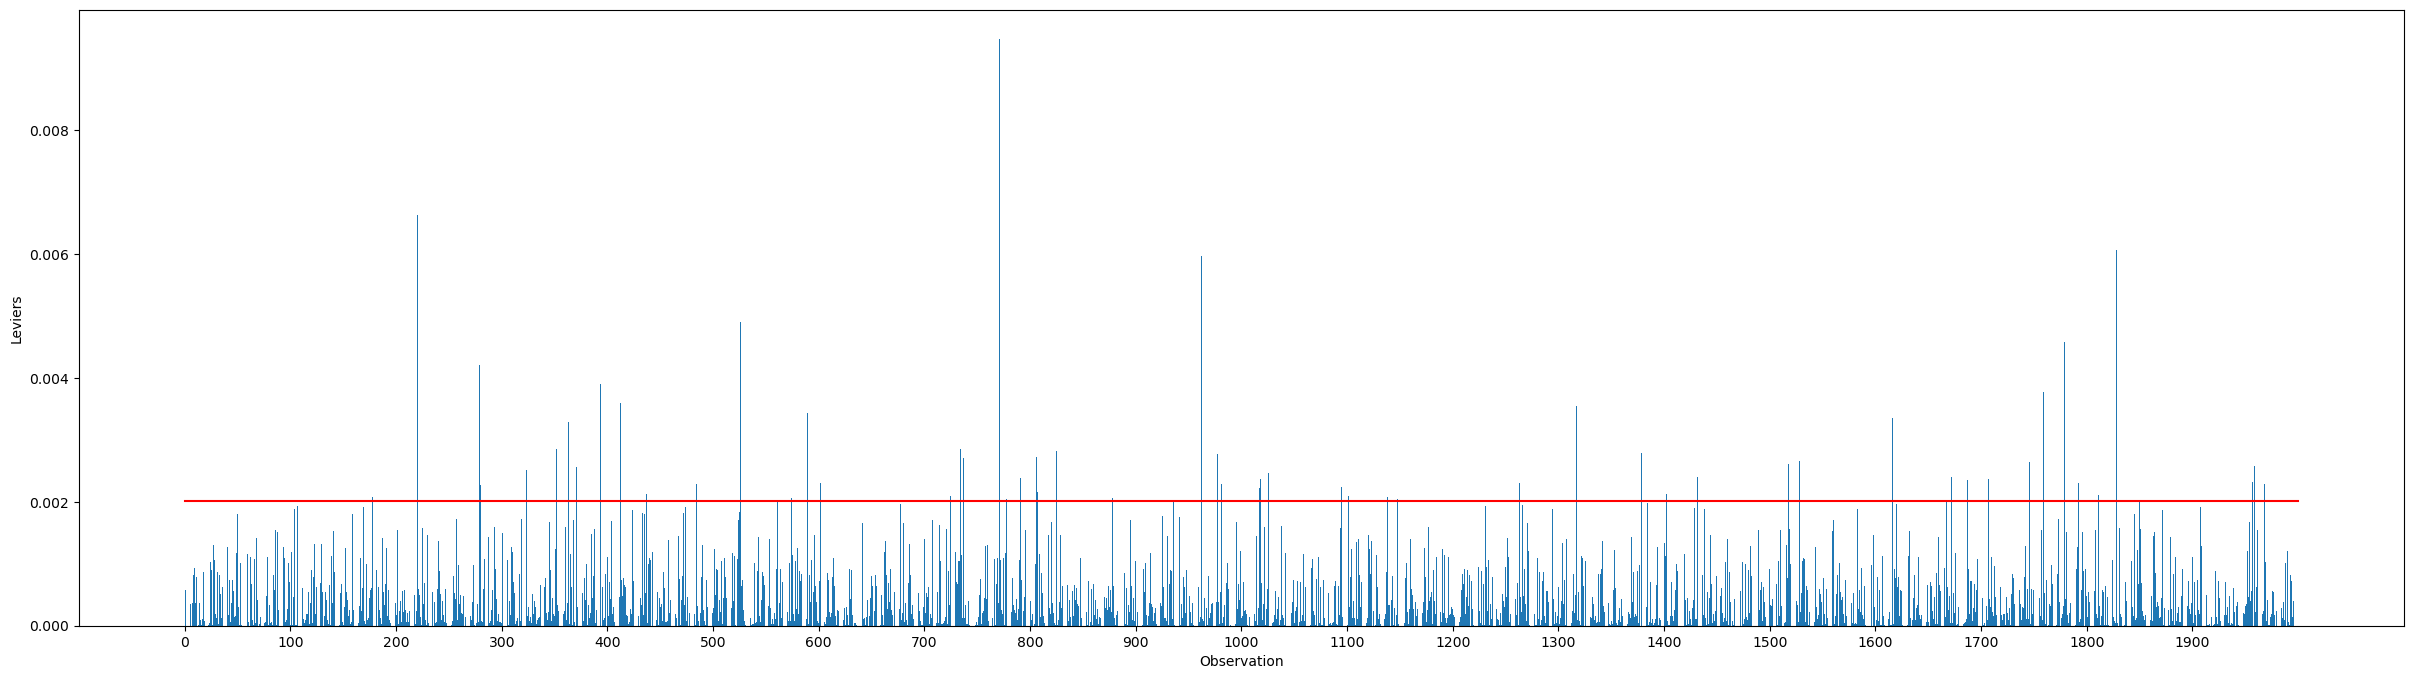

In [134]:
#utilise le critère de Cook pour detecter les points influent :
influence = reg_multi.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)
plt.figure(figsize=(30,8))
plt.bar(analyses['obs'], analyses['dcooks'])
plt.xticks(np.arange(0, 2000, step=100))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, 2000], [seuil_dcook, seuil_dcook], color='r')
plt.show()

##### Calculer les facteurs d'inflation de la variance (VIF) pour évaluer la multicollinéarité des variables dans un modèle de régression multiple:


In [135]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0026346555847374,
 1.0031210534997308,
 1.0033406266083194,
 1.0042541128035651,
 1.0044924120537717,
 1.0042810031749403,
 1.0057166447393733,
 1.0014287319035262,
 1.3607242390268506,
 1.3555275713889596]

#### ==>Tout les variables sont inférieur a 10 donc on a pas un problém de coleniarité entre les variables :

In [136]:
#réalise le test de Breusch-Pagan pour évaluer l'hétéroscédasticité des résidus dans le modèle de régression multiple et imprime la valeur p associée à ce test, permettant ainsi de déterminer s'il y a des preuves statistiques d'hétéroscédasticité dans le modèle:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 4.0762070030907294e-07


#### p value est significati ==> on rejete l'hupothése null carf 

In [137]:
#Le Test de Shapiro wilk pour la normalité des résidus
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9885339140892029, pvalue=1.5773160555454524e-11)

### on peut retirer l'hypothése NULL car p-value est significatif donc les résidus suivent la Loi Normal.



# ----------------------------------ACP----------------------------------

### On élémine les colones qu'on ne va pas utiliser :

In [138]:
data=training_set.drop([ 'talk_time','sc_w','sc_h','clock_speed','n_cores','touch_screen','wifi','three_g','blue','dual_sim','fc','four_g','m_dep','pc'], axis=1).head()

### Affichage des boites à moustache de chaque variable :

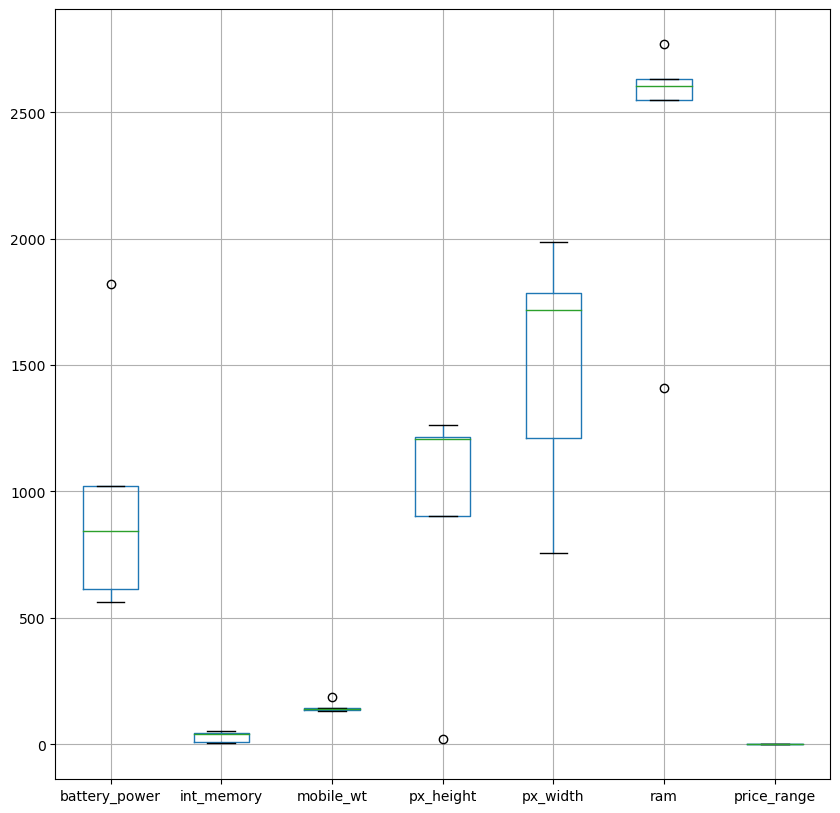

In [139]:
boxplot =data.boxplot(figsize=(10,10))

##### On remarque d'une part, q'il ya des grandes boites à moustaches donc il exist aussi des variables qui prennent des grandes valeurs (Variance fort),d'autre part il y a des petites boites à moustaches alors que ces variables prennent des petites valeurs et varient peu (variance faible).

### Graphe des données par paire de variables :

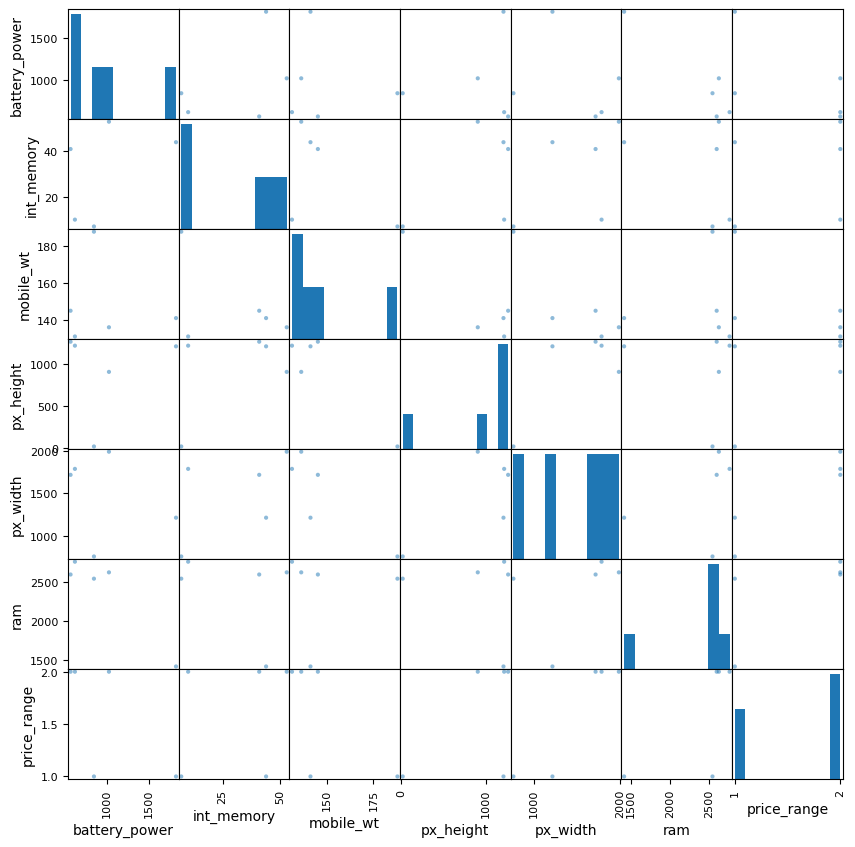

In [140]:
scatter_matrix(data, figsize=(10,10))
plt.show()

##### Le graphe par paires des variable montre que la colenearité entre les variables est un peu faible :

### Affichage de la matrice de correlation :

In [141]:
data.corr()


,battery_power,int_memory,mobile_wt,px_height,px_width,ram,price_range
battery_power,1.000000,0.435583,-0.095355,0.107690,-0.308554,-0.941427,-0.644496
int_memory,0.435583,1.000000,-0.513587,0.504118,0.498521,-0.365727,0.238680
mobile_wt,-0.095355,-0.513587,1.000000,-0.916054,-0.853980,0.063799,-0.650835
px_height,0.107690,0.504118,-0.916054,1.000000,0.703381,-0.209386,0.537245
px_width,-0.308554,0.498521,-0.853980,0.703381,1.000000,0.392267,0.925487
ram,-0.941427,-0.365727,0.063799,-0.209386,0.392267,1.000000,0.679014
price_range,-0.644496,0.238680,-0.650835,0.537245,0.925487,0.679014,1.000000


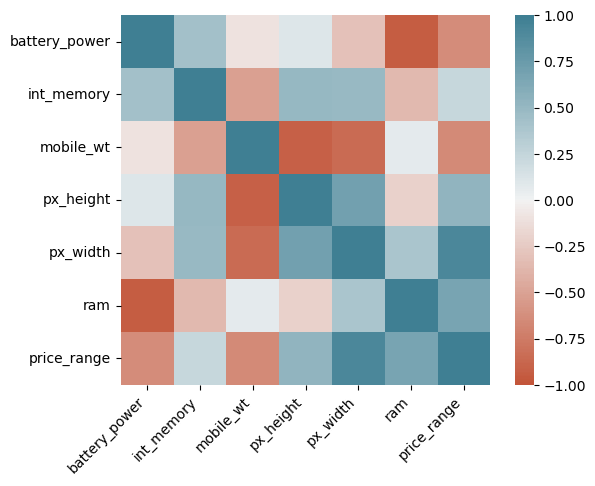

In [142]:
corr=data.corr()
ax = sns.heatmap(
corr,
vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True
)
ax.set_xticklabels(
ax.get_xticklabels(), rotation=45, horizontalalignment='right'
);

##### On remarque d'après la matrice de corrélation q'il y a une correlation forte entre les variables

### definir la fonction d'affichage du graphe "cercle de correlation" :

In [143]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        # On affiche les 3 premiers plans factoriels, donc le s 6 premières composantes
        if d2 < n_comp:
            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))
            
            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])
            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),pcs[d1,:], pcs[d2,:],angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            if labels is not None:
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation= label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)
                                                 
            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
            
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')
                    
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1)) 
            plt.show(block=False)

### Définir la fonction d'affichage du graphe  "Projection des individus sur F1 et F2 " :

In [144]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig = plt.figure(figsize=(7,6))
            
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2],alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                    plt.legend()
            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],fontsize='14', ha='center',va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
            
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')
            
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

### Définir la fonction d'affichage du graphe "Eboulis des valeurs propres" :

In [145]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie") 
    plt.ylabel("pourcentage d'inertie") 
    plt.title("Eboulis des valeurs propres") 
    plt.show(block=False)
    plt.show()


### Affichage les graphes qui representent :
   -  la variance expliqué par la 2ème composante principale
   - le nuage des points après projection
   - le cercle de correlation

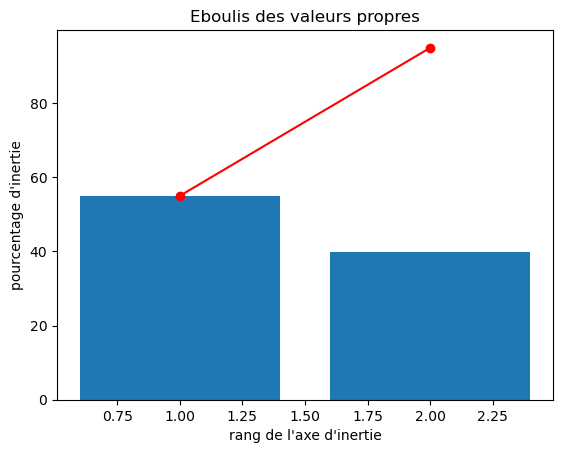

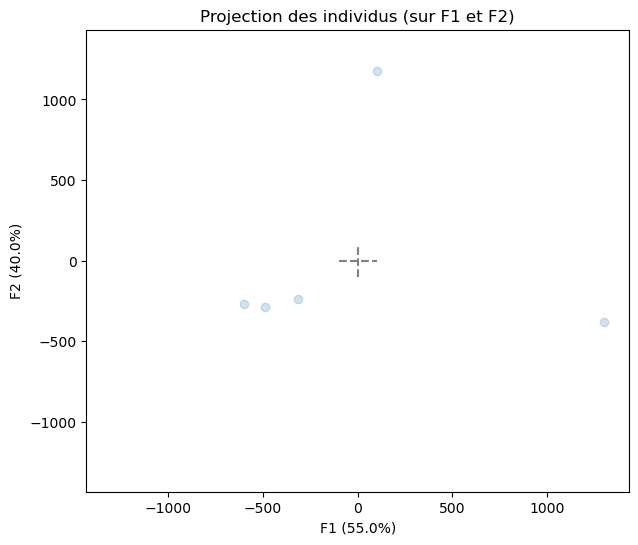

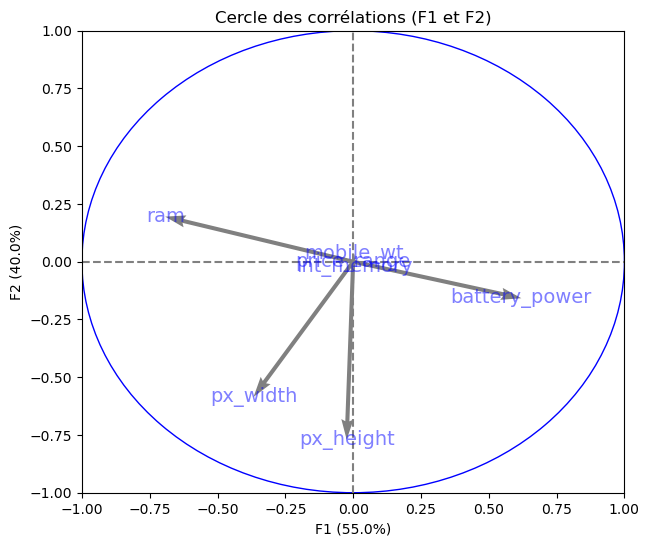

In [146]:
# choix du nombre de composantes à calculer
n_comp = 2
# import de l'échantillon
X = data.values
# Réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité.
# On se contente juste de centrer les données, ce qui est obligatoire pour une ACP.
X = preprocessing.StandardScaler(with_std=False).fit_transform(X)
# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X)
# Eboulis des valeurs propres
display_scree_plot(pca)
# projection des individus
X_projected = pca.transform(X)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], alpha = 0.2)
# Cercle des corrélations
features = data.columns
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)],labels = np.array(features))

#### ==> Il ya une correlation entre les variables (px_width et px_height, px_height et battery_power,...), et  les variables ram, px_width, px_height et battery_power sont bien representé

### Affichage du graphe d'Eboulis des valeurs propres pour 3 variables :

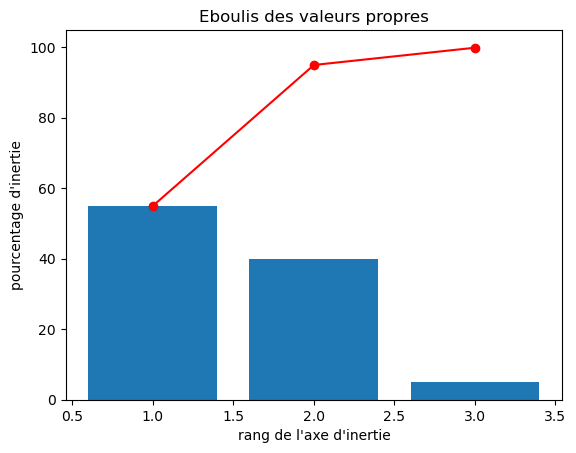

In [147]:
pca = decomposition.PCA(n_components= 3) 
pca.fit(X)
display_scree_plot(pca)

##### ==> la variance expliqué par la 3ème composante principale

### Pourcentage de variance expliquée par chacune des composantes :

In [148]:
print (pca.explained_variance_ratio_)
print (pca.explained_variance_ratio_.sum())

[0.55005797 0.39971759 0.04898489]
0.99876043824401
